# **PageRank Algorithm**

**Course**: MIE1624 - Introduction to Data Science and Analytics

**Instructor**: Dr. Oleksandr Romanko

**Due Date**: Tues, 26 Jan 2021

**Group 2:**
  * Arshdeep Bamrah (Student ID: 998997475) 
  * Yuan Chen (Student ID: 1006735749)
  * Luke Fregonese (Student ID: 98839011)
  * Qisheng He (Student ID: 999502275)
  * Naiyu Hu (Student ID: 998258086)
  * Monica Leng (Student ID: 1007601436)
  * Sugumar Prabhakaran (Student ID: 994126815)

## **1. Introduction**
PageRank is an algorithm that evaluates the importance of a webpage by analyzing the quantity and quality of other pages that link to it. It was invented by Google’s founders Larry Page and Sergey Brin when they were both graduate students at Stanford and was then patented to Stanford University. 
#### **Webpages as Directed Arc Graphs (DAG)**

Web pages and their relationships can be represented by a directed graph.  In the example below, webpage 1 contains a link to webpage 2, which is represented by a one-way directed arc.  The weights of each arc corresponds to the relative importance a particular page is giving to another page, with the total of all weights from a node = 1.


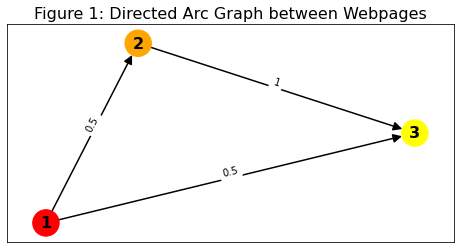

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#create nodes (pages) and add directed edges between them (links)
G = nx.DiGraph()
G.add_nodes_from(range(1, 4))
G.add_edges_from([(1,2),(1,3)], weight=0.5)
G.add_edges_from([(2,3)], weight=1)

edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
positions={1: (1,1), 2:(2,3), 3:(5,2)}

#create a plot to view the network

plt.figure(figsize=(8,4))
nx.draw_networkx(G, positions, 
                 with_labels=True, node_size=700, 
                 node_color=['red','orange','yellow'],
                 font_size=16, font_weight='bold', arrowsize=18, width=1.5)
nx.draw_networkx_edge_labels(G, positions, edge_labels=edge_labels,
                             verticalalignment='bottom')
plt.title("Figure 1: Directed Arc Graph between Webpages",
          {'color':'black', 'fontsize':16})
plt.show()

## **2. Pseudocode**

The pseudocode below will be implemented in a PageRank function in part 4.

1. **Inputs/Parameters to PageRank function**: 

 * $M_{ij}$: link adjacency matrix, which represents the link from j to i where the sum of each column of i is 1. (columns are normalized)
 * **n_iter**: number of iterations (default = 100)
 * $d$: damping factor (default = 0.85)

2. **Output**: eigenvector $R$, which contains the page ranks

3. **PageRank function definition**:

 * initialize an $N \times 1$ eigenvector $R$ as ranking vector using

    * $\forall PR(p_j) \in R, PR(p_j) = \frac{1}{N}$

 * Calculate initial value for $M_{damped} = \frac{1-d}{N} + d\cdot M_{ij}$

 * **Power Method**: repeat for **n_iter** iterations:

    * $R = M_{damped} \times R$ (matrix multiplication)

 * return the eigenvector $R$

## **3. PageRank Example #1**

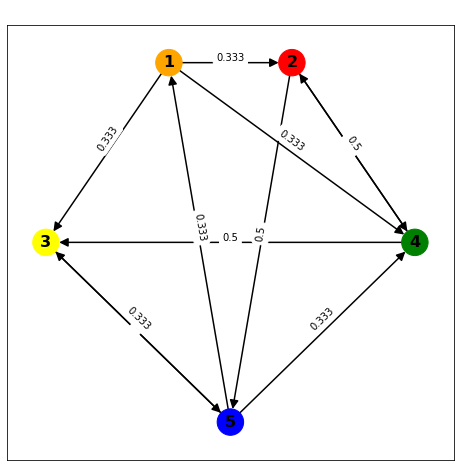

In [ ]:
#create nodes (pages) and add directed edges between them (links)
G = nx.DiGraph()
G.add_nodes_from(range(1, 6))
G.add_edges_from([(1,2),(1,3),(1,4)], weight=0.333)
G.add_edges_from([(2,4),(2,5)], weight=0.5)
G.add_edges_from([(3,5)], weight=1)
G.add_edges_from([(4,2),(4,3)], weight=0.5)
G.add_edges_from([(5,1),(5,3), (5,4)], weight=0.333)

edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
positions={1: (3,4), 2:(4,4), 3:(2,3), 4: (5,3), 5: (3.5,2)}

#create a plot to view the network
plt.figure(figsize=(8,8))
nx.draw_networkx(G, positions, 
                 with_labels=True, node_size=700, 
                 node_color=['orange','red','yellow','green','blue'],
                 font_size=16, font_weight='bold', arrowsize=18, width=1.5)
nx.draw_networkx_edge_labels(G, positions, edge_labels=edge_labels,
                             verticalalignment='bottom')
plt.title("Example #1 Directed Arc Graph between Webpages",
          {'color':'white', 'fontsize':16})
plt.show()

#### **Step 1:  Calculate Adjacency Matrix (A)**

For our example graph, we already have all $L(p_j)$ stored in a dictionary with $p_j$ as keys:

* $L[p_j]$ = $\left \{p_1:3, p_2:2, p_3:1, p_4:2, p_5:3 \right \}$

Using these values, we can calculate the adjacency matrix ($A$), which is defined as follows:

$M_{ij} \begin{equation} =\left\{ \begin{array}{@{}ll@{}} 1/L(p_j), & \text{if}\ \text{webpage j links to webpage i,} \\ 0, & \text{otherwise} \end{array}\right. \end{equation}$

Therefore, 

\begin{equation} M_{ij} = \begin{bmatrix}
  0&           0&  0&            0& \frac{1}{3}\\ 
 \frac{1}{3}&  0&  0&  \frac{1}{2}& 0\\ 
 \frac{1}{3}&  0&  0&  \frac{1}{2}& \frac{1}{3}\\ 
 \frac{1}{3}&  \frac{1}{2}&  0&  0& \frac{1}{3}\\ 
  0&  \frac{1}{2}&  1&  0& 0
\end{bmatrix} \end{equation}

Note that all the columns sum up to 1 since a webpage's importance is divided among all the pages it is linked to.



In [ ]:
#Reference: https://networkx.org/documentation/stable/reference/generated/
#networkx.convert_matrix.to_numpy_array.html

M = nx.convert_matrix.to_numpy_array(G, weight = 'weight')
#from networkx documentation, matrix M[i,j] entry in row i and col j corresponds 
#to an edge from i to j.  Since pageRank has opposite definition of M[i,j], we 
# transpose the matrix
M = M.transpose()
print("M = \n", M)

M = 
 [[0.    0.    0.    0.    0.333]
 [0.333 0.    0.    0.5   0.   ]
 [0.333 0.    0.    0.5   0.333]
 [0.333 0.5   0.    0.    0.333]
 [0.    0.5   1.    0.    0.   ]]


#### **Step 2: Initialize Eigenvector (R)**

The eigenvector ($R$) stores all our page ranks.  To calculate, we initialize each element in $R$ to a random value between 1 and 0 or alternatively set $PR(p_j) = \frac{1}{N}$.  In our example, $PR(p_j) = \frac{1}{5}$:

\begin{equation} R = \begin{bmatrix}
PR(p_1)\\ 
PR(p_2)\\ 
PR(p_3)\\ 
PR(p_4)\\ 
PR(p_5)
\end{bmatrix} = \begin{bmatrix}
\frac{1}{5}\\ 
\frac{1}{5}\\ 
\frac{1}{5}\\ 
\frac{1}{5}\\ 
\frac{1}{5}
\end{bmatrix} \end{equation}


#### **Step 3: Calculate R Iteratively**

For our example, we have 5 webpages so $N = 5$.  In addition, we use a damping value of $d = 0.85$ as per the convention.

We iterate through both step 2 and step 3 are combined below in the **PageRank function**.

In [ ]:
# adapted from https://en.wikipedia.org/wiki/PageRank
import numpy as np

def PageRank(M, n_iter: int = 100, d: float = 0.85):
    """
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', 
        such that for all 'j', sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Return : numpy array of ranks such that R_i is the i-th rank from [0, 1],
        R sums to 1
    """
    
    N = M.shape[1]                     # calc no. webpages from cols in M
    R = np.ones((N,1))*(1/N)            # initialize eigenvector values as 1/N
    M_damped = (d * M + (1 - d) / N)    # initial value of M_damped
    for i in range(n_iter):             # iterate multiplication n_iter times
        R = M_damped @ R
    return R

#### **Step 4: Search Results**

From applying the algorithm to our example, we can see that the most important page is page #5.  The search results would produce the following results:

1. **Page 5:** 0.283
2. **Page 3:** 0.226
3. **Page 4:** 0.202
4. **Page 2:** 0.146
5. **Page 1:** 0.109

In [ ]:
R = PageRank(M)
print("R =\n", R)

R =
 [[0.10915773]
 [0.14580306]
 [0.22596774]
 [0.20205318]
 [0.28311963]]


## **4. PageRank Example #2 - Effect of Damping**

This next example will quickly show the effects of the damping parameter.  This can have a significant influence when there are nodes that have few or no links.  We have added a new node 6 to this example below.

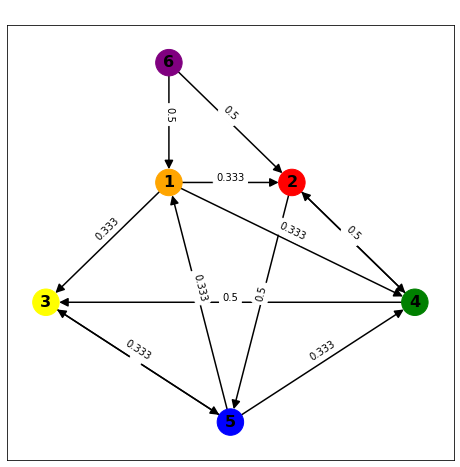

In [ ]:
#create a copy of G and add a 6th node
G2 = G.copy()
G2.add_nodes_from(range(1, 7))

G2.add_edges_from([(6,1),(6,2)], weight=0.5)

edge_labels=dict([((u,v,),d['weight']) for u,v,d in G2.edges(data=True)])
positions[6] = (3,5)

#create a plot to view the network
plt.figure(figsize=(8,8))
nx.draw_networkx(G2, positions, 
                 with_labels=True, node_size=700, 
                 node_color=['orange','red','yellow','green','blue', 'purple'],
                 font_size=16, font_weight='bold', arrowsize=18, width=1.5)
nx.draw_networkx_edge_labels(G2, positions, edge_labels=edge_labels,
                             verticalalignment='bottom')
plt.title("Example #2 Directed Arc Graph between Webpages",
          {'color':'white', 'fontsize':16})
plt.show()

The new adjacency matrix for this graph looks like this:

\begin{equation} M_{ij} = \begin{bmatrix}
 0&  0&  0&  0& \frac{1}{3}& \frac{1}{2}\\ 
 \frac{1}{3} &  0&  0&  \frac{1}{2}& 0& \frac{1}{2}\\ 
 \frac{1}{3} &  0&  0&  \frac{1}{2}& \frac{1}{3}& 0\\ 
 \frac{1}{3} &  \frac{1}{2}&  0&  0& \frac{1}{3}& 0\\ 
 0&  \frac{1}{2}&  1&  0& 0& 0\\
 0&  0&  0&  0& 0& 0
\end{bmatrix} \end{equation}

We have added a sixth row and column to acount for the 6th node and as you can see there are only arcs leaving 6, which are represented in column 6.

In [ ]:
M_2 = nx.convert_matrix.to_numpy_array(G2, weight = 'weight').transpose()
print("M_2 = \n", M_2)

M_2 = 
 [[0.    0.    0.    0.    0.333 0.5  ]
 [0.333 0.    0.    0.5   0.    0.5  ]
 [0.333 0.    0.    0.5   0.333 0.   ]
 [0.333 0.5   0.    0.    0.333 0.   ]
 [0.    0.5   1.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.   ]]


In [ ]:
#with normal damping (d=0.85)
R_d1 = PageRank(M_2, d=0.85)
print("R_d1 =\n", R_d1, "\n")

#without damping influence (d=1)
R_d2 = PageRank(M_2, d=1)
print("R_d2 =\n", R_d2, "\n")

#with damping influence (d=0.2)
R_d3 = PageRank(M_2, d=0.2)
print("R_d3 =\n", R_d3)

R_d1 =
 [[0.11119268]
 [0.14920421]
 [0.2156494 ]
 [0.19582774]
 [0.27098078]
 [0.0241841 ]] 

R_d2 =
 [[0.09923938]
 [0.13235344]
 [0.23159282]
 [0.1985039 ]
 [0.29789282]
 [0.        ]] 

R_d3 =
 [[0.15794392]
 [0.17344821]
 [0.17247789]
 [0.17256611]
 [0.18427098]
 [0.13242701]]


## **5. Results**

Without using damping (d=1), we can see that webpage 6 has a ranking of 0.  In contrast when we have a large amount of damping (d=0.2) we observe that the ranking order has changed slightly and the overall ranking scores are much closer together.

$\>$ $\>$ $\>$ d=0.85 $\>$ $\>$ $\>$ $\>$ $\>$ $\>$ $\>$ $\>$$\>$  $\>$$\>$   d=1: $\>$ $\>$ $\>$ $\>$$\>$ $\>$ $\>$ $\>$ $\>$$\>$ $\>$ $\>$ $\>$ $\>$d=0.2:
1. **Page 5:** 0.271 $\>$ $\>$    1. **Page 5:** 0.298 $\>$ $\>$     1. **Page 5:** 0.184
2. **Page 3:** 0.216 $\>$ $\>$     2. **Page 3:** 0.232 $\>$ $\>$     2. **Page 2:** 0.1734
3. **Page 4:** 0.196 $\>$ $\>$     3. **Page 4:** 0.199 $\>$ $\>$     3. **Page 4:** 0.1725
4. **Page 2:** 0.149 $\>$ $\>$     4. **Page 2:** 0.132 $\>$ $\>$     4. **Page 3:** 0.1724
5. **Page 1:** 0.111 $\>$ $\>$    5. **Page 1:** 0.099 $\>$ $\>$     5. **Page 1:** 0.158
6. **Page 6:** 0.024 $\>$ $\>$     6. **Page 6:** 0.000 $\>$ $\>$     6. **Page 6:** 0.132

## **7. PageRank Variants**

### Weighted PageRank
Proposed by Wenpu Xing and Ali Ghorbani in 2004.

The original algorithm distribute the page rank of a page equally among its outgoing linked pages. The weighted PageRank allows distribution of the page rank according to the importance or the popularity of the webpage, i.e. it can give more value to the important pages. 

In addition to the original PageRank algorithm, the weighted PageRank assigns a weight value to each edge, which determines the fraction of the page rank value that will be transferred from the source page to the outgoing page through the edge.

$PR(u) = (1-d) + d\sum_{v \in B(u)} \frac{PR(v)}{N_v} W^{in}(v,u) W^{out}(v,u)$ where:

- $PR(u)$ is the page rank of page u that we would like to know
- $PR(v)$ is the page rank value of page v that is pointing to page u
- $W^{in}(v,u)$ is the popularity from the number of inlinks, calculated with the number of inlinks of page u and the number of inlink of all reference pages of page v 
- $W^{out}(v,u)$ is calculated based upon number of out links of page u and the number of out links of all references pages of page v

$W^{in}(v,u)$ and $W^{out}(v,u)$ are calculated as follows:

$W^{in}(v,u) = \frac{I_u}{\sum_{p \in R(v)} I_p}$ where:
- $I_u$ and $I_p$ are number of inlinks of pages u and p, respectively
- $R(v)$ is the set of pages pointed by v

and

$W^{out}(v,u) = \frac{O_u}{\sum_{p \in R(v)} O_p}$ where:
- $O_u$ and $O_p$ are number of outlinks of pages u and p, respectively
- $R(v)$ is the set of pages pointed by v


Advantages:
* Takes into account the importance of both the inlinks and outlinks
of the pages
* Distributes rank scores based on the
popularity of the pages
* Converges very fast

Limitation:
* Does not consider user access pattern and page relevancy

This can be implemented iteratively with the page rank values updated at each step. An implementation can be seen here: https://docs.oracle.com/cd/E56133_01/2.4.0/reference/algorithms/pagerank.html.


Note that if each edge has the same weight, this is identical to the original PageRank algorithm. 

### PageRank based on visits of links (vol)
Proposed by Gyanendra Kumar, Neelam Duhan, A. K. Sharma in 2011 at
International Conference on Computer & Communication Technology (ICCCT)-2011.


Again, this algorithms does not distribute the page rank of a page equally, but assigns more value to the outgoing links that are most visited by users.

$PR(u) = (1-d) + d \sum_{v \in B(u)} \frac{PR(v)L_u}{TL(v)}$ where: 
- $PR(u)$ and $PR(v)$ are the page ranks of webpages u and v, respectively
- $d$ is the damping factor
- $B(u)$ is the set of pages pointing to u
- $L_u$ is the number of visits of links which are pointing from v to u
- $TL(v)$ is the total number of visits of all links from v


Advantages:
* Displays most valuable pages on the top of the result list based on user browsing behaviour

Limitation:
* Converges slower compared to weighted PageRank

### Other Variants
- Weighted PageRank based on visits of links
- Personalized PageRank
- Personalized Weighted PageRank
- Topic sensitive PageRank
- Stochastic Approach for Link Structure Analysis (SALSA)
- Ratio based Weighted PageRank
- etc.

## **8. References**:

1. https://stackoverflow.com/questions/20133479/how-to-draw-directed-graphs-using-networkx-in-python
2. http://pi.math.cornell.edu/~mec/Winter2009/RalucaRemus/Lecture3/lecture3.html
3. https://en.wikipedia.org/wiki/PageRank
4. https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.to_numpy_array.html

5. https://pdfs.semanticscholar.org/70f8/d27954ce7ef49e351aca6d4b6b368cfef1c7.pdf
6. https://www.ijser.org/researchpaper/A-Literature-Survey-on-Page-Rank-Algorithm.pdf
7. https://docs.oracle.com/cd/E56133_01/2.4.0/reference/algorithms/pagerank.html
8. https://neo4j.com/docs/graph-algorithms/current/algorithms/page-rank/#algorithms-pagerank-personalized
